<a href="https://colab.research.google.com/github/shahalam1111/Student-performance-in-secondary-education-prediction/blob/main/Student_performance_in_secondary_education_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score, roc_curve


# **Data Collection and Processing**

In [2]:
# Load datasets
mat = pd.read_csv('student-mat.csv', sep=';')
por = pd.read_csv('student-por.csv', sep=';')

In [3]:
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
# Adding a new column to each dataset to indicate the subject
mat['subject'] = 'Math'
por['subject'] = 'Portuguese'


In [6]:
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


In [7]:
mat.shape

(395, 34)

In [8]:
obj1=mat.isnull().sum()
for key,value in obj1.items():
  print(key, ", ",value)

school ,  0
sex ,  0
age ,  0
address ,  0
famsize ,  0
Pstatus ,  0
Medu ,  0
Fedu ,  0
Mjob ,  0
Fjob ,  0
reason ,  0
guardian ,  0
traveltime ,  0
studytime ,  0
failures ,  0
schoolsup ,  0
famsup ,  0
paid ,  0
activities ,  0
nursery ,  0
higher ,  0
internet ,  0
romantic ,  0
famrel ,  0
freetime ,  0
goout ,  0
Dalc ,  0
Walc ,  0
health ,  0
absences ,  0
G1 ,  0
G2 ,  0
G3 ,  0
subject ,  0


In [9]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Portuguese
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Portuguese
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Portuguese
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Portuguese
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Portuguese


In [10]:
por.shape

(649, 34)

In [11]:
obj2=por.isnull().sum()
for key,value in obj2.items():
  print(key, ", ",value)

school ,  0
sex ,  0
age ,  0
address ,  0
famsize ,  0
Pstatus ,  0
Medu ,  0
Fedu ,  0
Mjob ,  0
Fjob ,  0
reason ,  0
guardian ,  0
traveltime ,  0
studytime ,  0
failures ,  0
schoolsup ,  0
famsup ,  0
paid ,  0
activities ,  0
nursery ,  0
higher ,  0
internet ,  0
romantic ,  0
famrel ,  0
freetime ,  0
goout ,  0
Dalc ,  0
Walc ,  0
health ,  0
absences ,  0
G1 ,  0
G2 ,  0
G3 ,  0
subject ,  0


In [12]:
# Concatenate the datasets
combined_df = pd.concat([mat, por], ignore_index=True)

In [13]:
combined_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


In [14]:
combined_df.tail()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,Portuguese
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,Portuguese
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,Portuguese
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,Portuguese
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,4,10,11,11,Portuguese


In [15]:
combined_df.shape

(1044, 34)

In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

# **Data Visualization**

In [17]:
# Bar plots for categorical features
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                        'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'subject']

<ipython-input-18-9d3d608759d1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, x=feature, palette='Set2')
<ipython-input-18-9d3d608759d1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, x=feature, palette='Set2')
<ipython-input-18-9d3d608759d1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, x=feature, palette='Set2')
<ipython-input-18-9d3d608759d1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

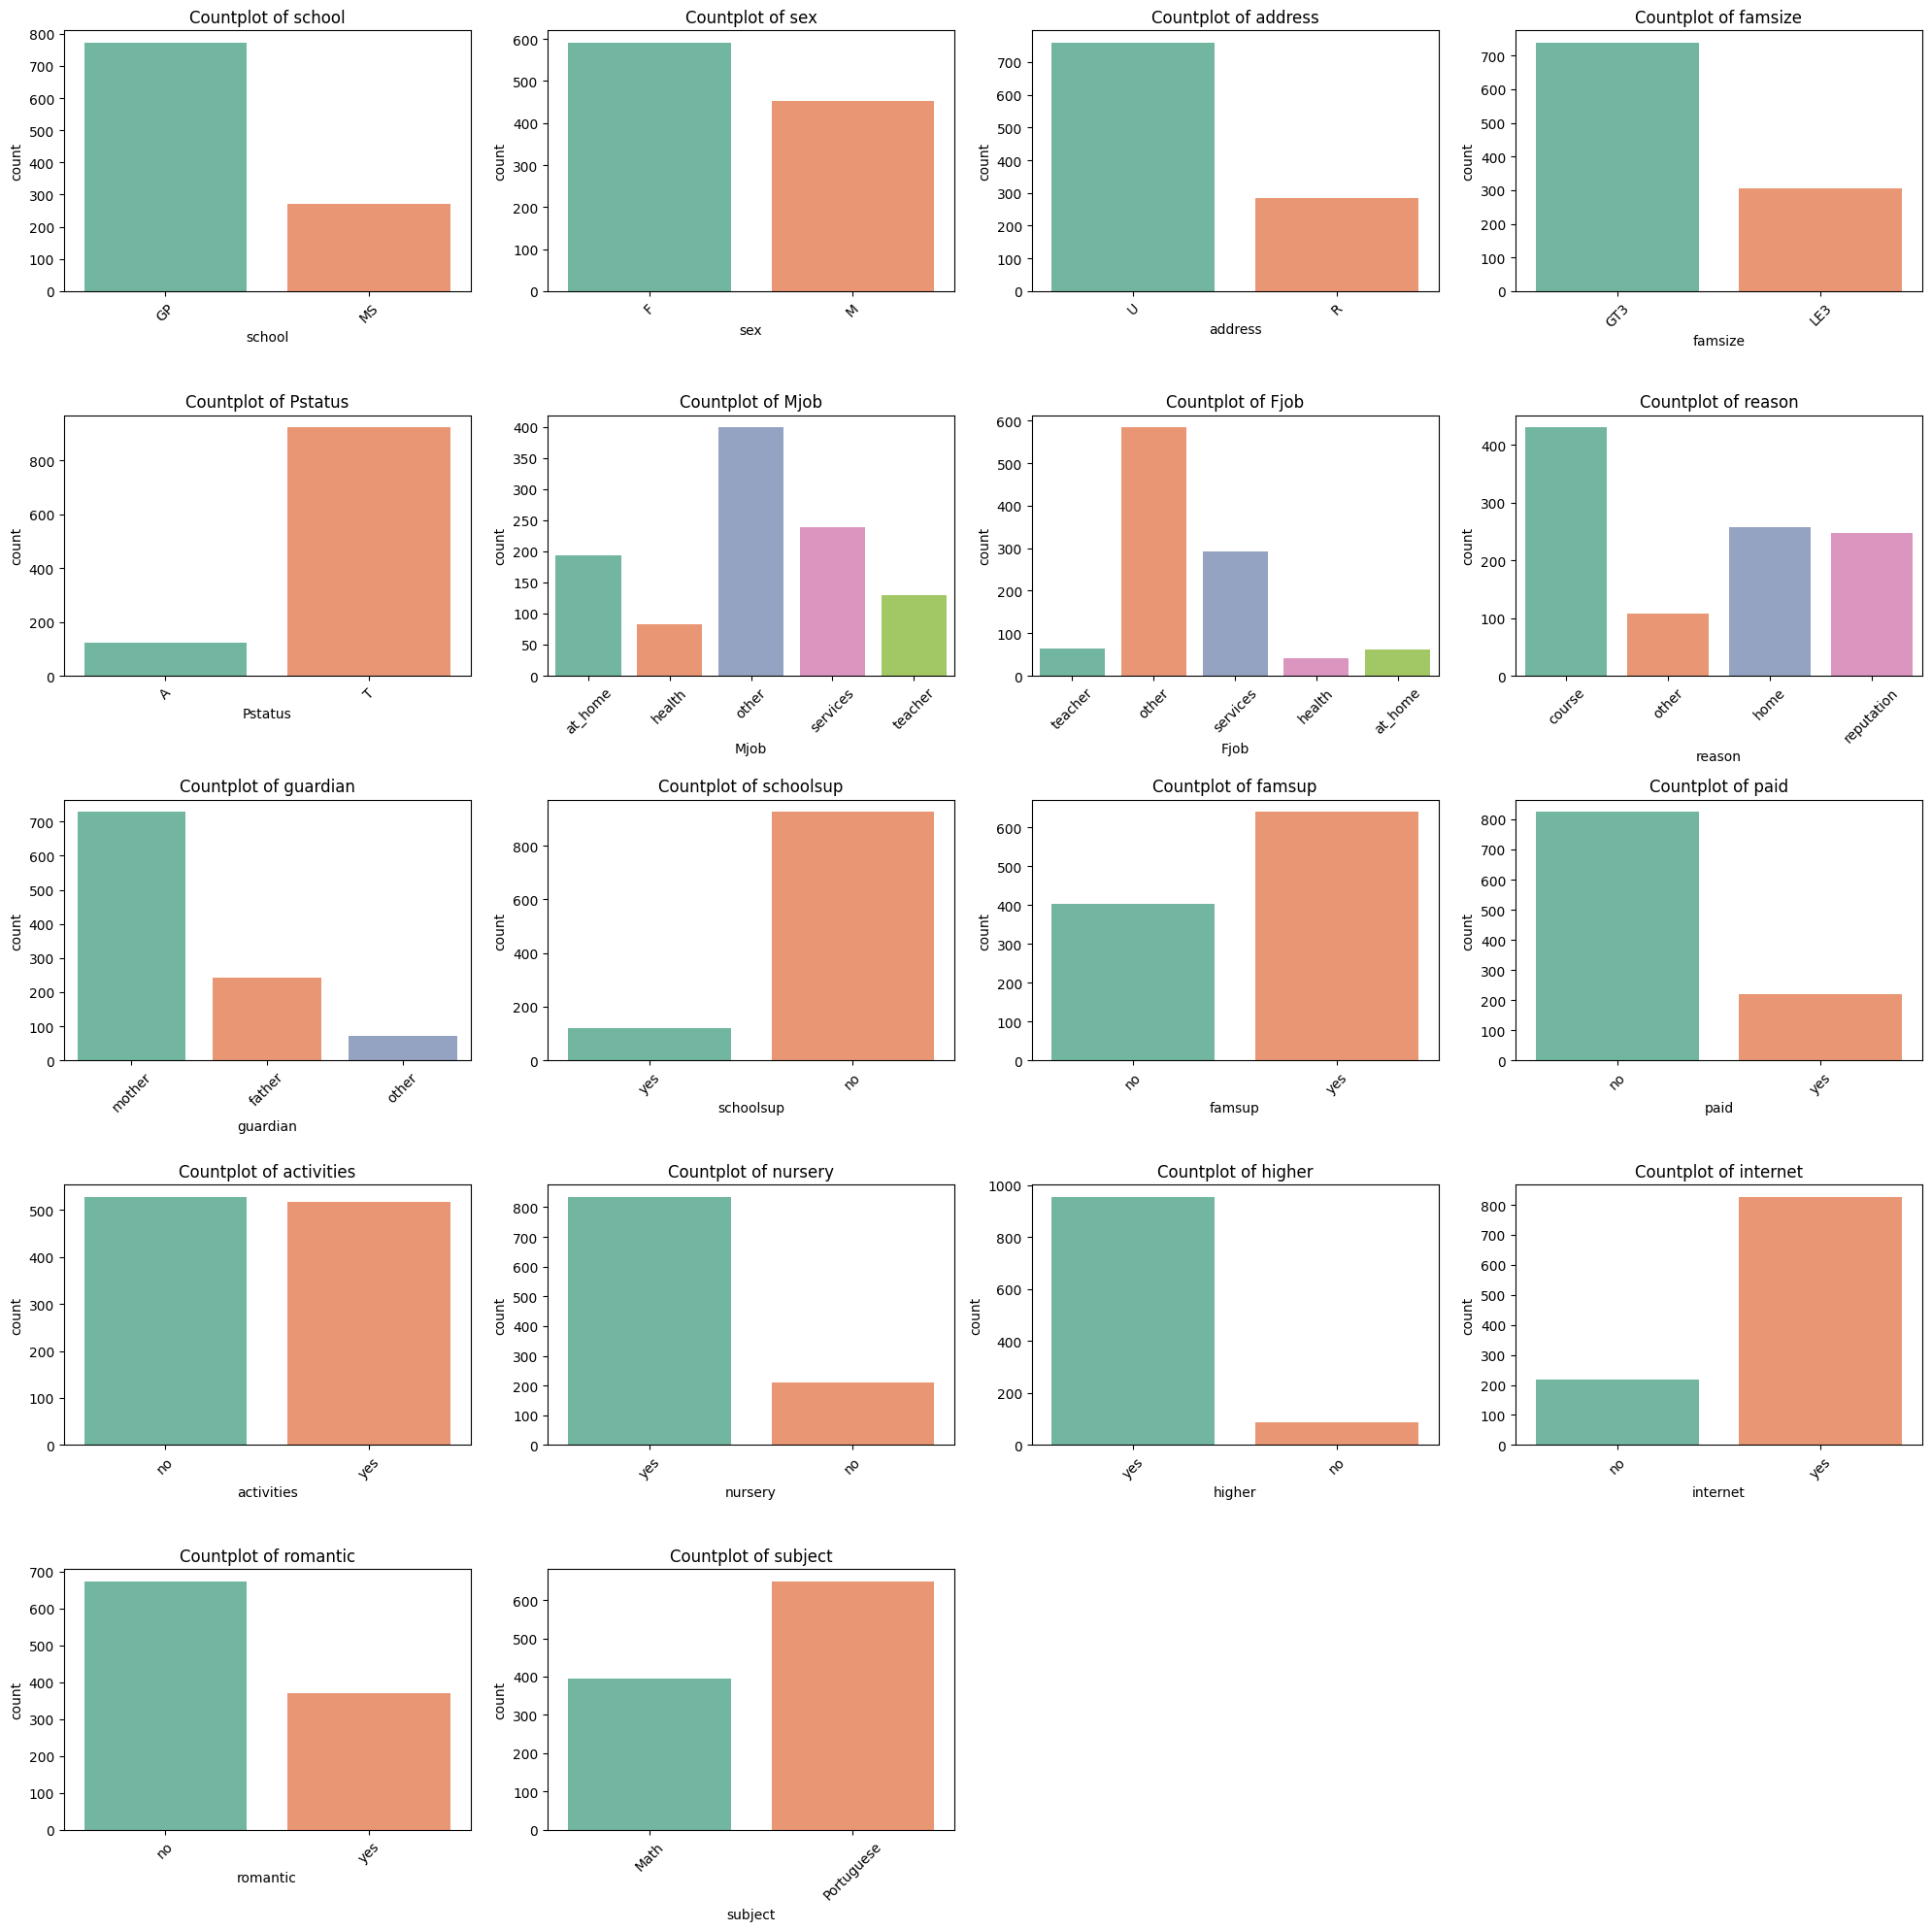

In [18]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i)
    sns.countplot(data=combined_df, x=feature, palette='Set2')
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Histograms for numerical features
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
                      'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

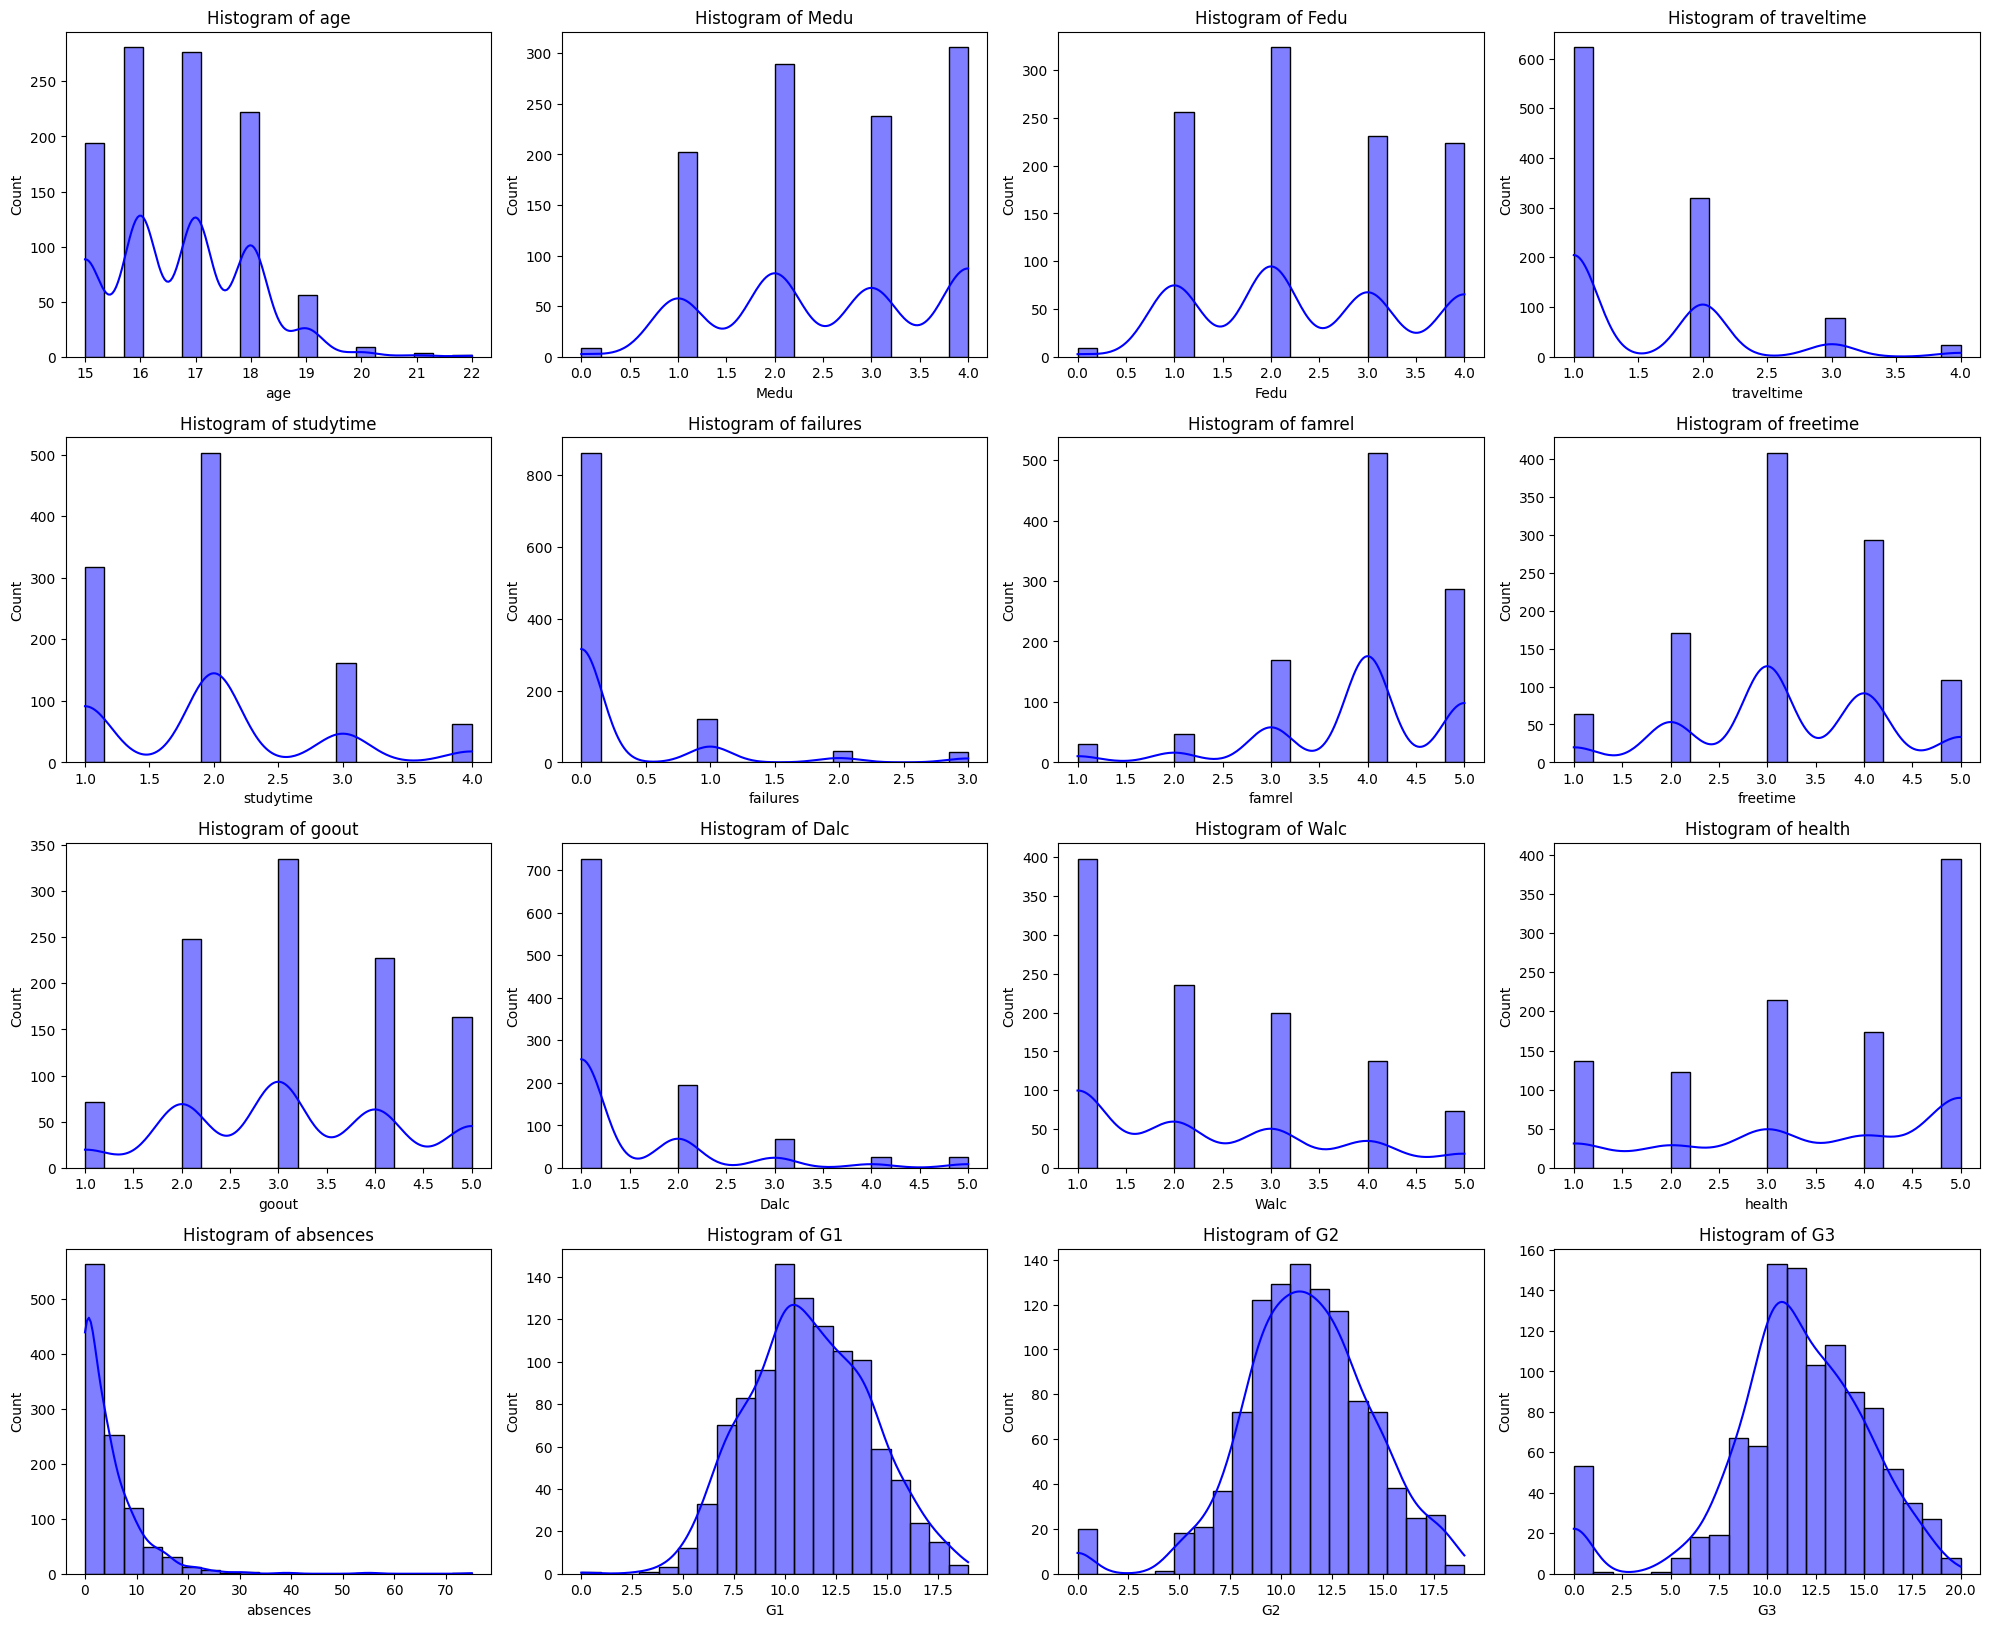

In [20]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 4, i)
    sns.histplot(combined_df[feature], kde=True, bins=20, color='blue')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

<ipython-input-21-14b513caa8be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x=feature, y='G3', palette='Set3')
<ipython-input-21-14b513caa8be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x=feature, y='G3', palette='Set3')
<ipython-input-21-14b513caa8be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x=feature, y='G3', palette='Set3')
<ipython-input-21-14b513caa8be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

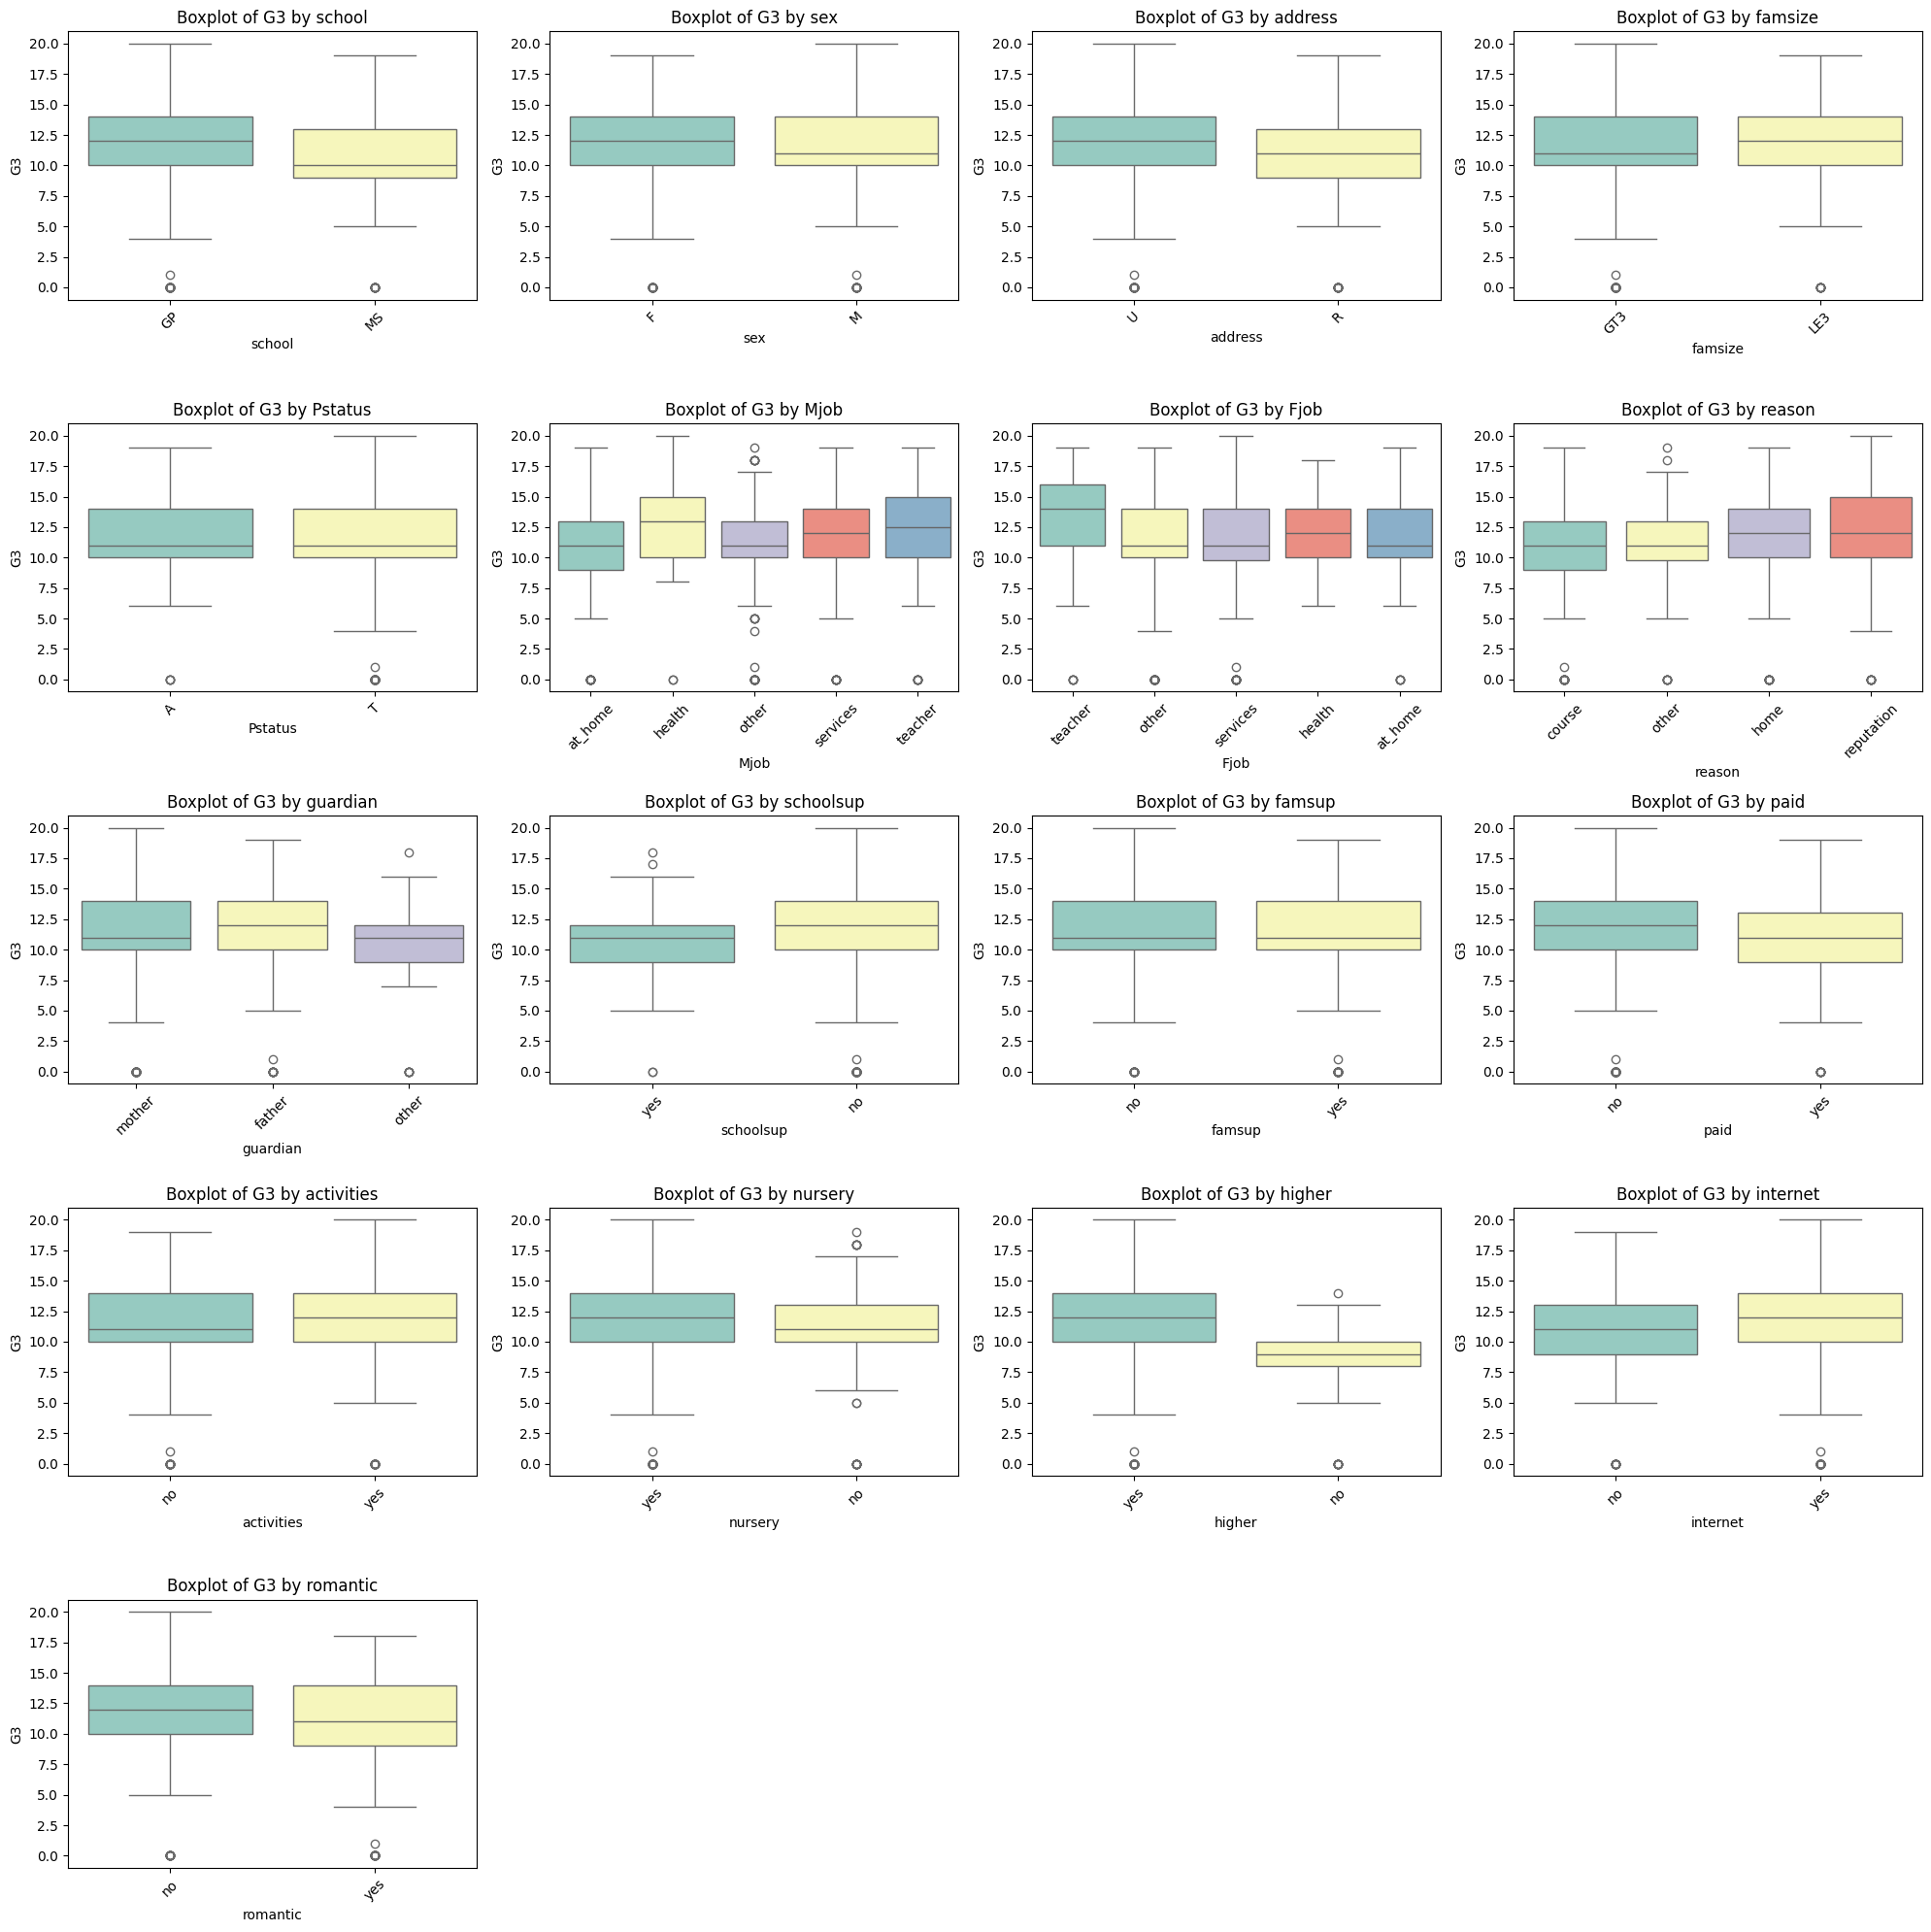

In [21]:
# Box plots to visualize the distribution of grades across different categorical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features, 1):
    if feature != 'subject':  # Skipping the subject feature for better visualization
        plt.subplot(5, 4, i)
        sns.boxplot(data=combined_df, x=feature, y='G3', palette='Set3')
        plt.title(f'Boxplot of G3 by {feature}')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

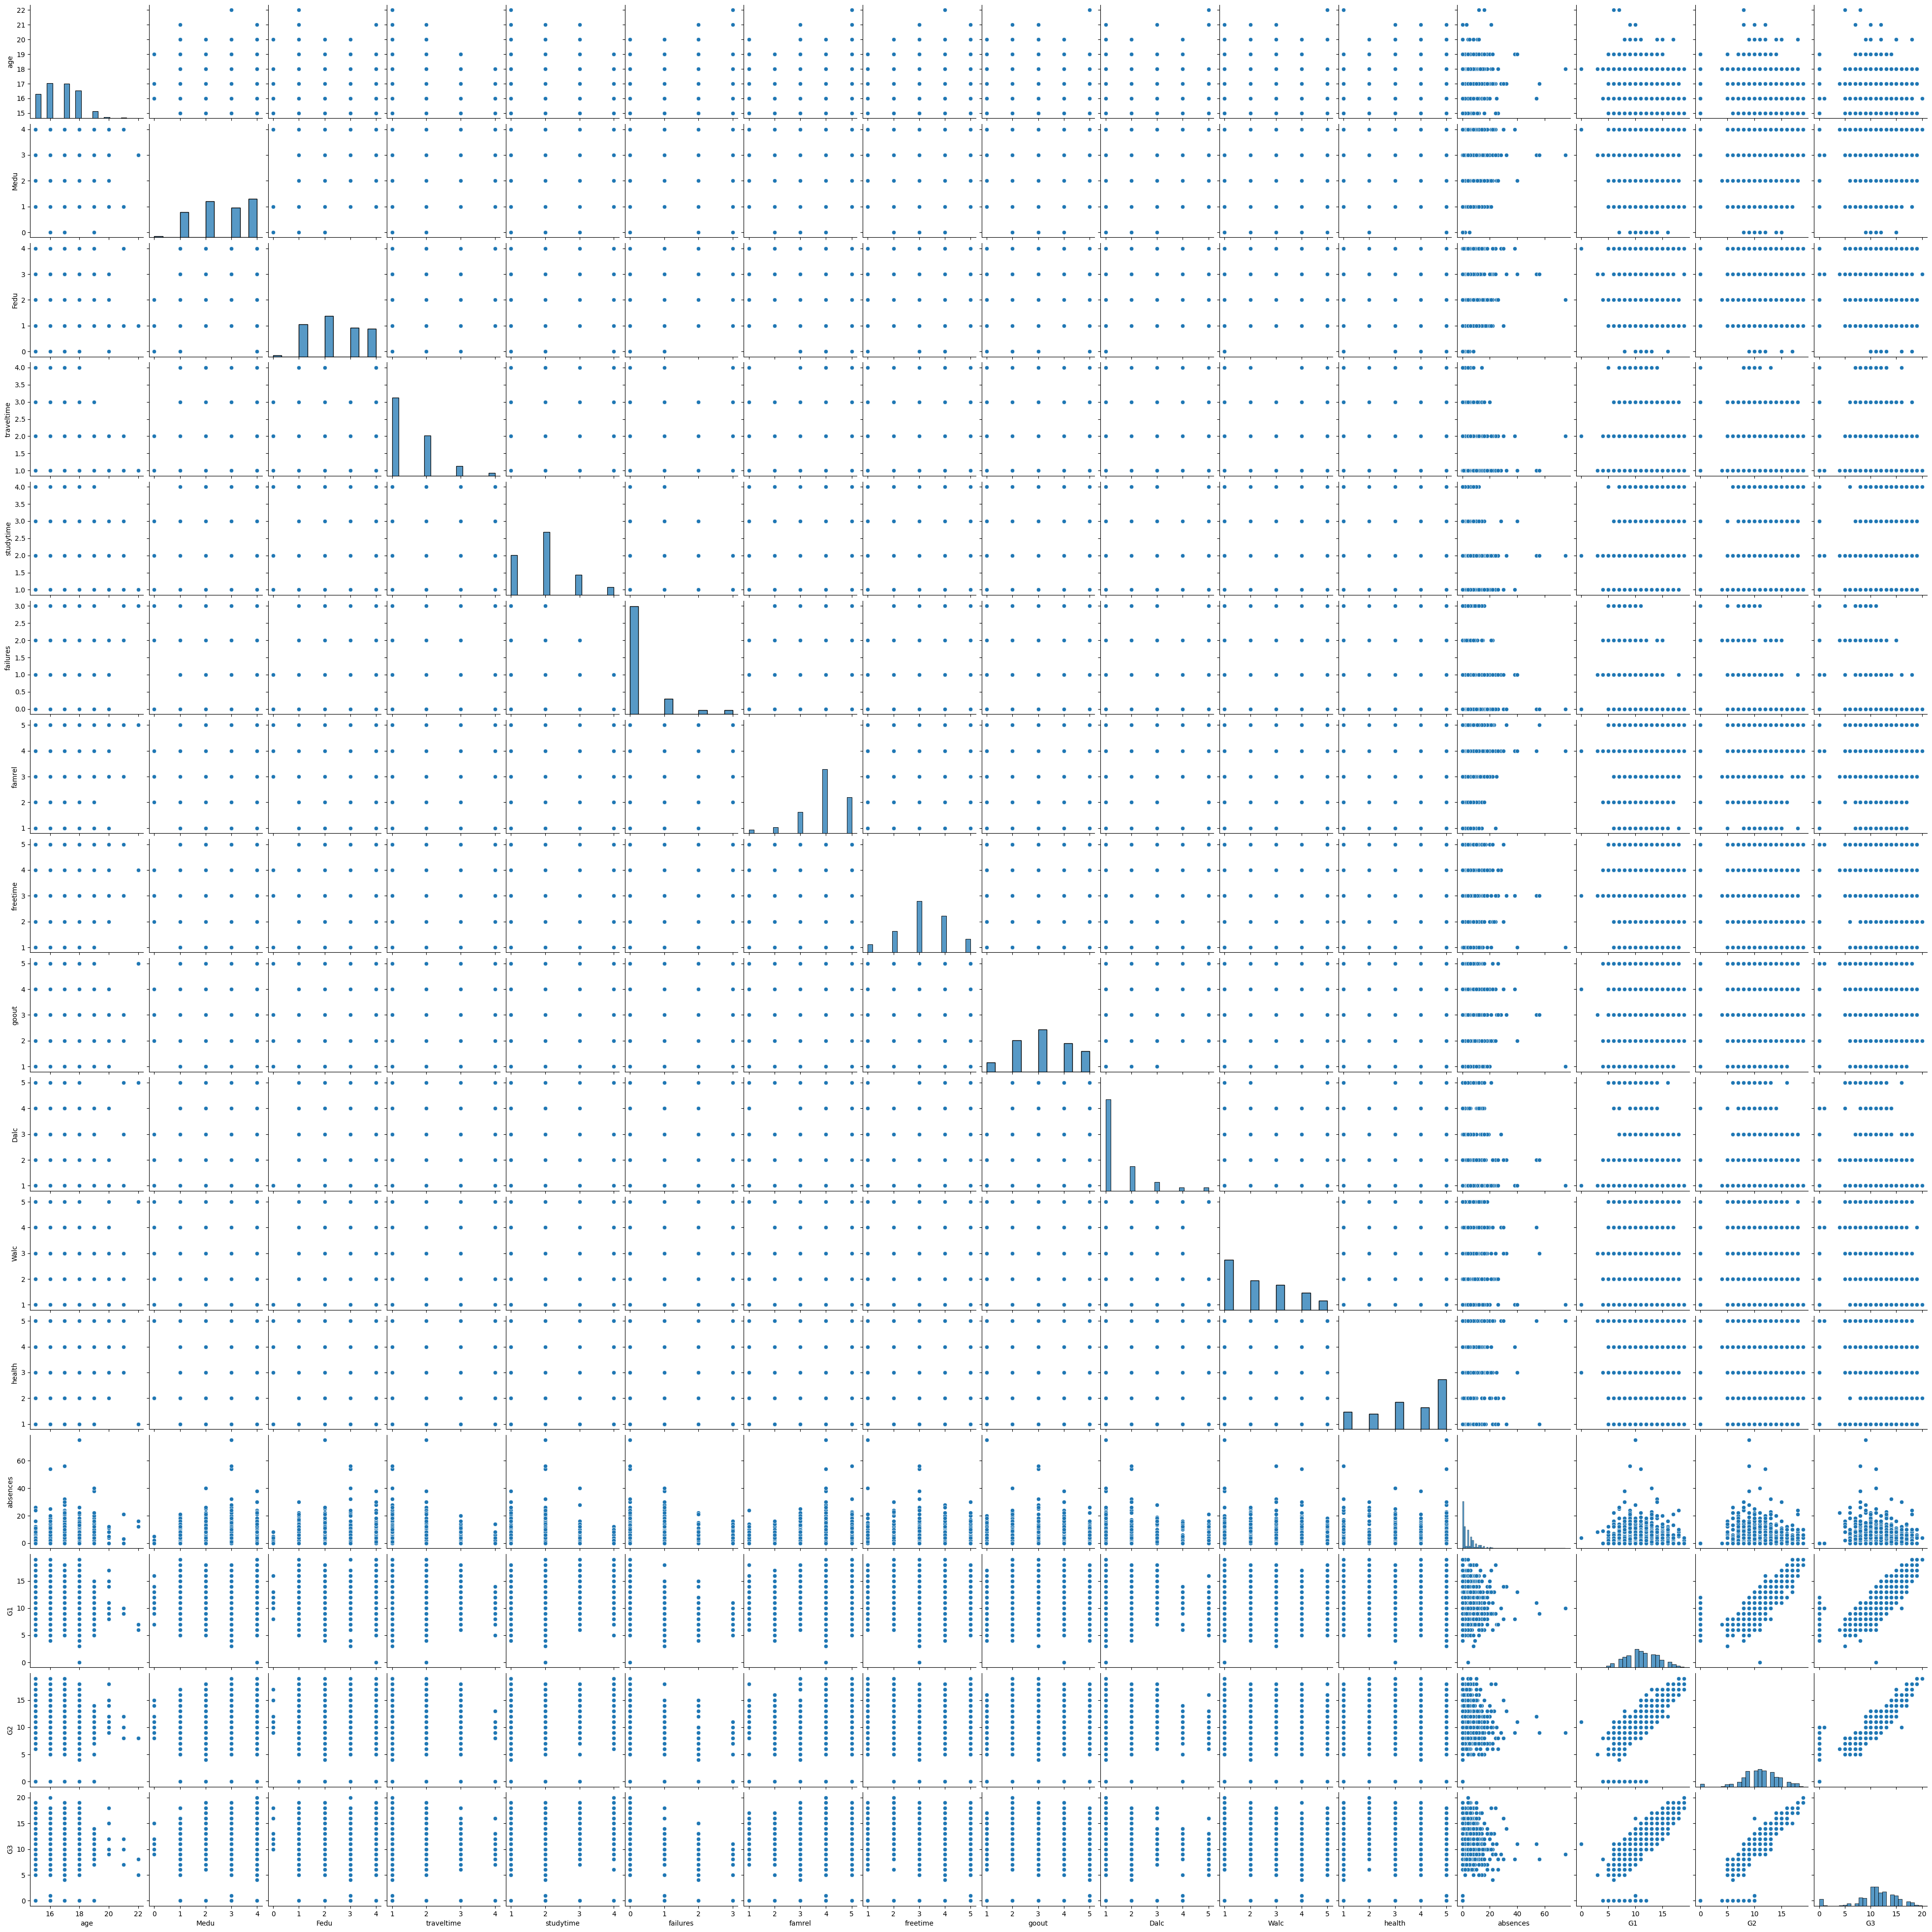

In [22]:
# Pair plot for numerical features to visualize relationships
sns.pairplot(combined_df[numerical_features])
plt.show()

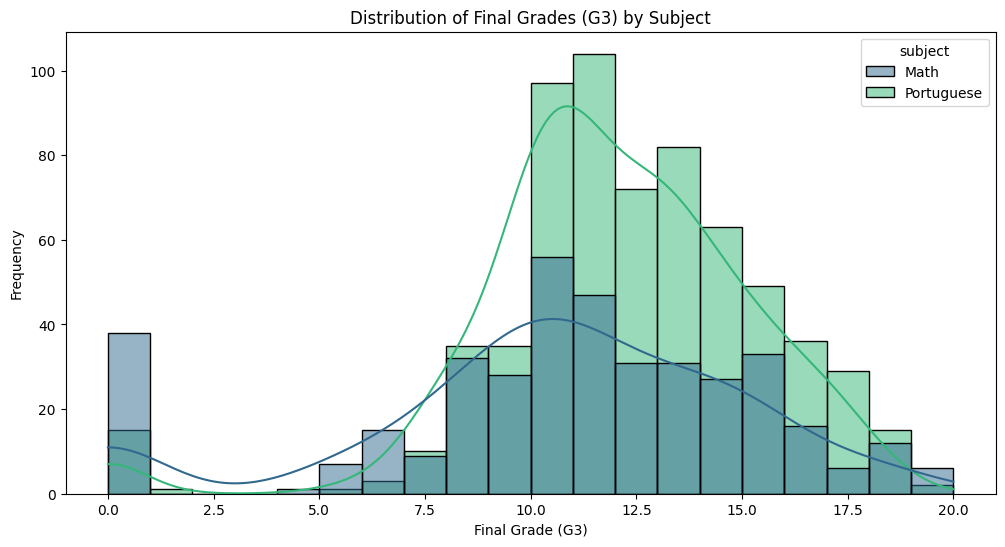

In [23]:
# Visualize the distribution of final grades (G3) for each subject
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='G3', hue='subject', kde=True, bins=20, palette='viridis')
plt.title('Distribution of Final Grades (G3) by Subject')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

# Impact of Key Demographic and Social Factors

<ipython-input-26-cc47b261770f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='G3', data=combined_df, palette='viridis')


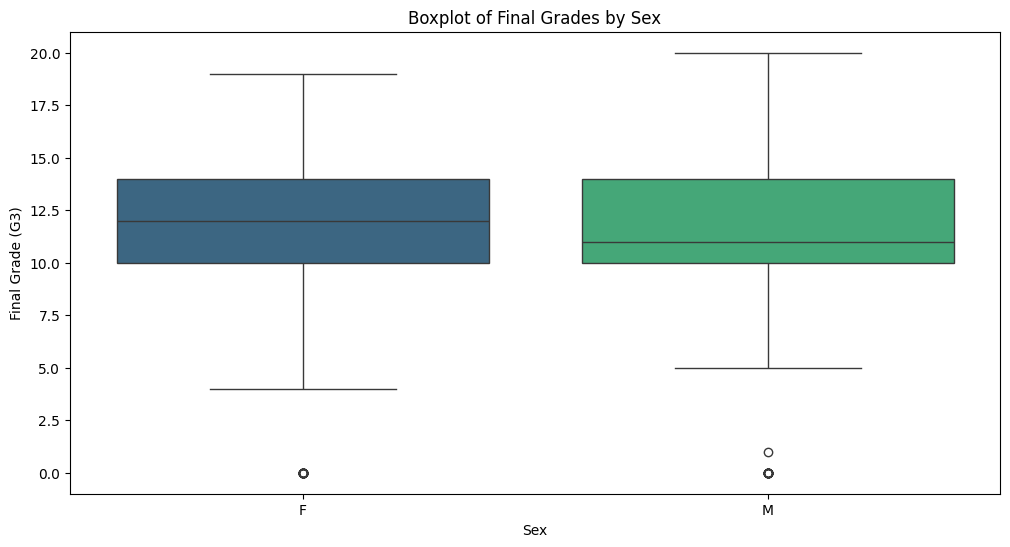

In [26]:
# Boxplot of final grades by sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='G3', data=combined_df, palette='viridis')
plt.title('Boxplot of Final Grades by Sex')
plt.xlabel('Sex')
plt.ylabel('Final Grade (G3)')
plt.show()

<ipython-input-27-5dd30848532d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='address', y='G3', data=combined_df, palette='viridis')


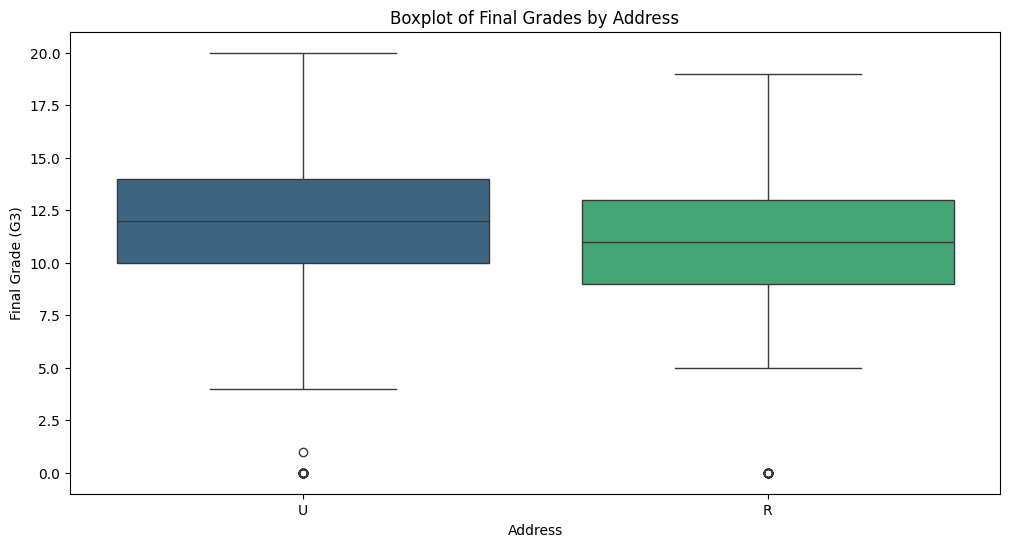

In [27]:
# Boxplot of final grades by address
plt.figure(figsize=(12, 6))
sns.boxplot(x='address', y='G3', data=combined_df, palette='viridis')
plt.title('Boxplot of Final Grades by Address')
plt.xlabel('Address')
plt.ylabel('Final Grade (G3)')
plt.show()

<ipython-input-28-26c92243a3cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medu', y='G3', data=combined_df, palette='viridis')


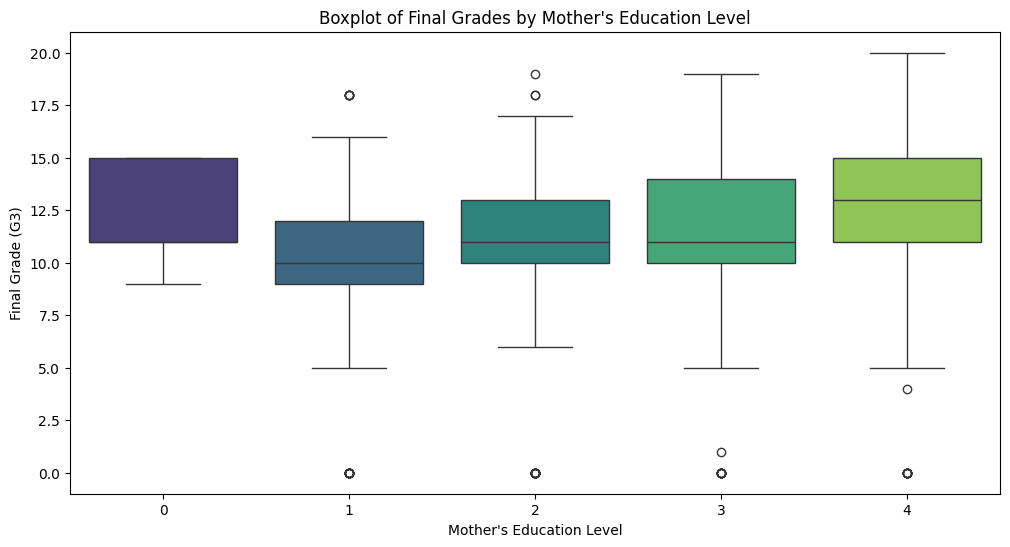

In [28]:
# Boxplot of final grades by parents' education level
plt.figure(figsize=(12, 6))
sns.boxplot(x='Medu', y='G3', data=combined_df, palette='viridis')
plt.title("Boxplot of Final Grades by Mother's Education Level")
plt.xlabel("Mother's Education Level")
plt.ylabel('Final Grade (G3)')
plt.show()


<ipython-input-29-5e8f9a9d8cb9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fedu', y='G3', data=combined_df, palette='viridis')


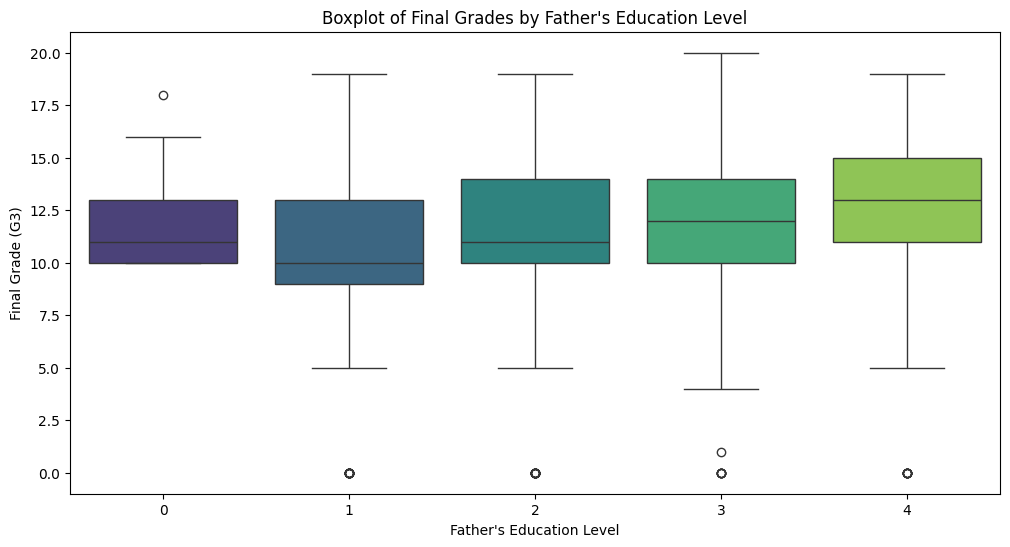

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fedu', y='G3', data=combined_df, palette='viridis')
plt.title("Boxplot of Final Grades by Father's Education Level")
plt.xlabel("Father's Education Level")
plt.ylabel('Final Grade (G3)')
plt.show()

# Distribution of Study Time and Failures

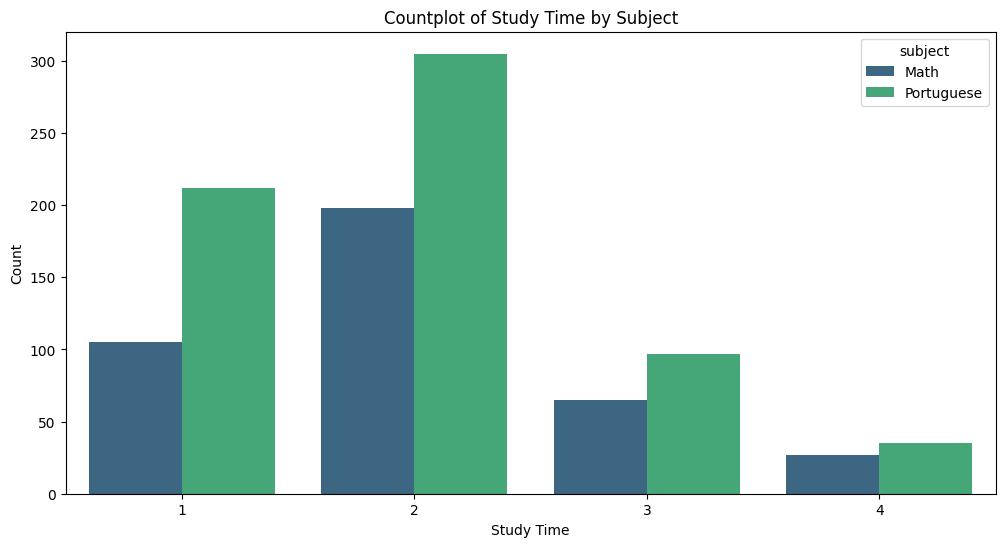

In [30]:
# Countplot of study time
plt.figure(figsize=(12, 6))
sns.countplot(x='studytime', hue='subject', data=combined_df, palette='viridis')
plt.title('Countplot of Study Time by Subject')
plt.xlabel('Study Time')
plt.ylabel('Count')
plt.show()

<ipython-input-31-8bcbd346508a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='failures', y='G3', data=combined_df, palette='viridis')


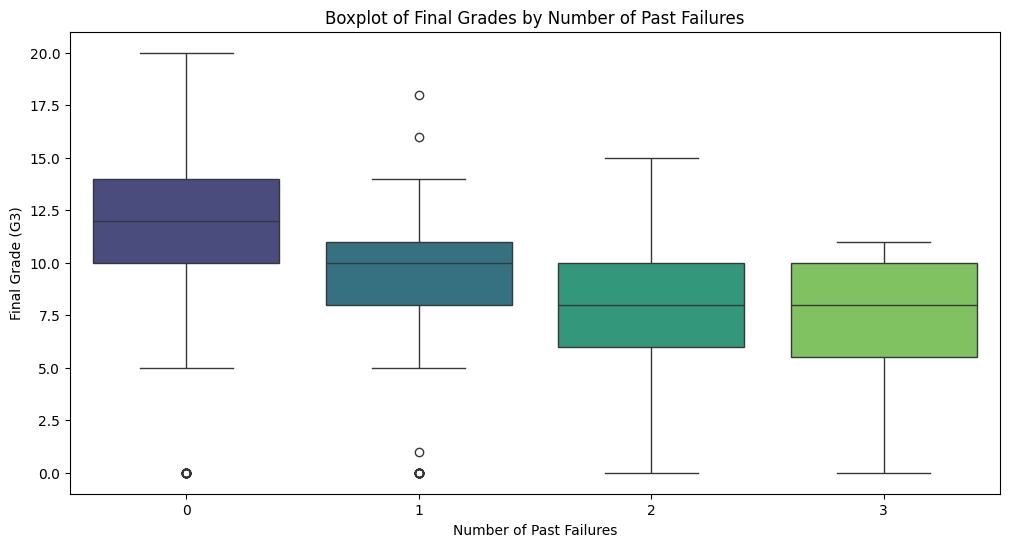

In [31]:
# Boxplot of final grades by number of past failures
plt.figure(figsize=(12, 6))
sns.boxplot(x='failures', y='G3', data=combined_df, palette='viridis')
plt.title('Boxplot of Final Grades by Number of Past Failures')
plt.xlabel('Number of Past Failures')
plt.ylabel('Final Grade (G3)')
plt.show()

# Relationship between Alcohol Consumption and Final Grades

<ipython-input-32-270d098e69d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dalc', y='G3', data=combined_df, palette='viridis')


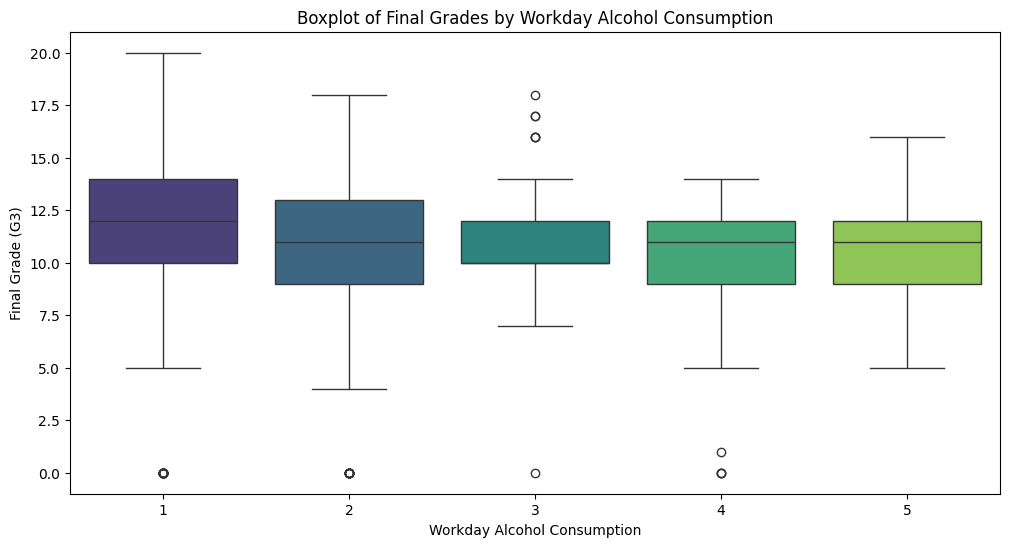

In [32]:
# Boxplot of final grades by workday alcohol consumption
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dalc', y='G3', data=combined_df, palette='viridis')
plt.title('Boxplot of Final Grades by Workday Alcohol Consumption')
plt.xlabel('Workday Alcohol Consumption')
plt.ylabel('Final Grade (G3)')
plt.show()


<ipython-input-33-24dde998927e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Walc', y='G3', data=combined_df, palette='viridis')


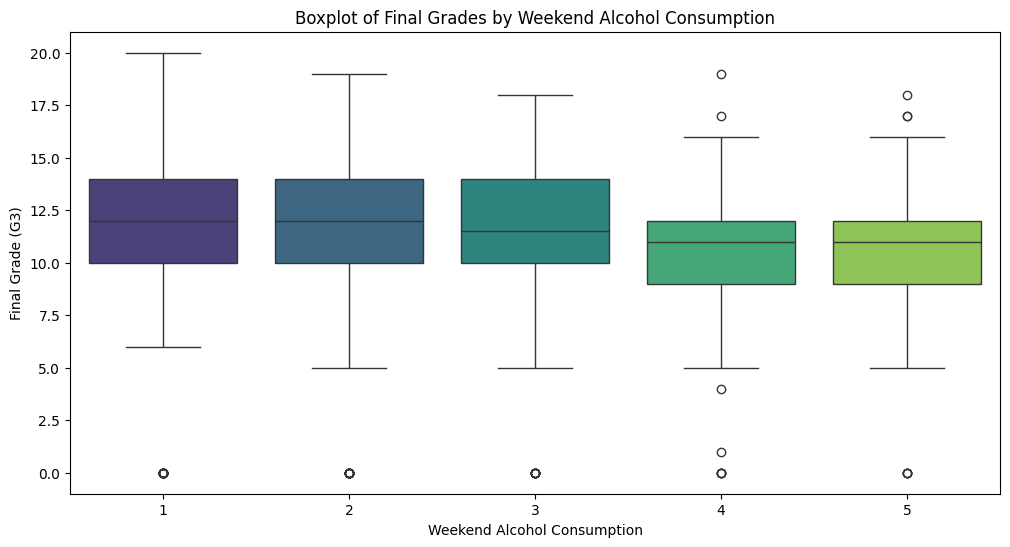

In [33]:
# Boxplot of final grades by weekend alcohol consumption
plt.figure(figsize=(12, 6))
sns.boxplot(x='Walc', y='G3', data=combined_df, palette='viridis')
plt.title('Boxplot of Final Grades by Weekend Alcohol Consumption')
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Final Grade (G3)')
plt.show()

 **Convert categorical columns to numerical values**





In [19]:
def preprocess_data(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
    return df

In [20]:
combined_df = preprocess_data(combined_df)

# Correlation Matrix Heatmap

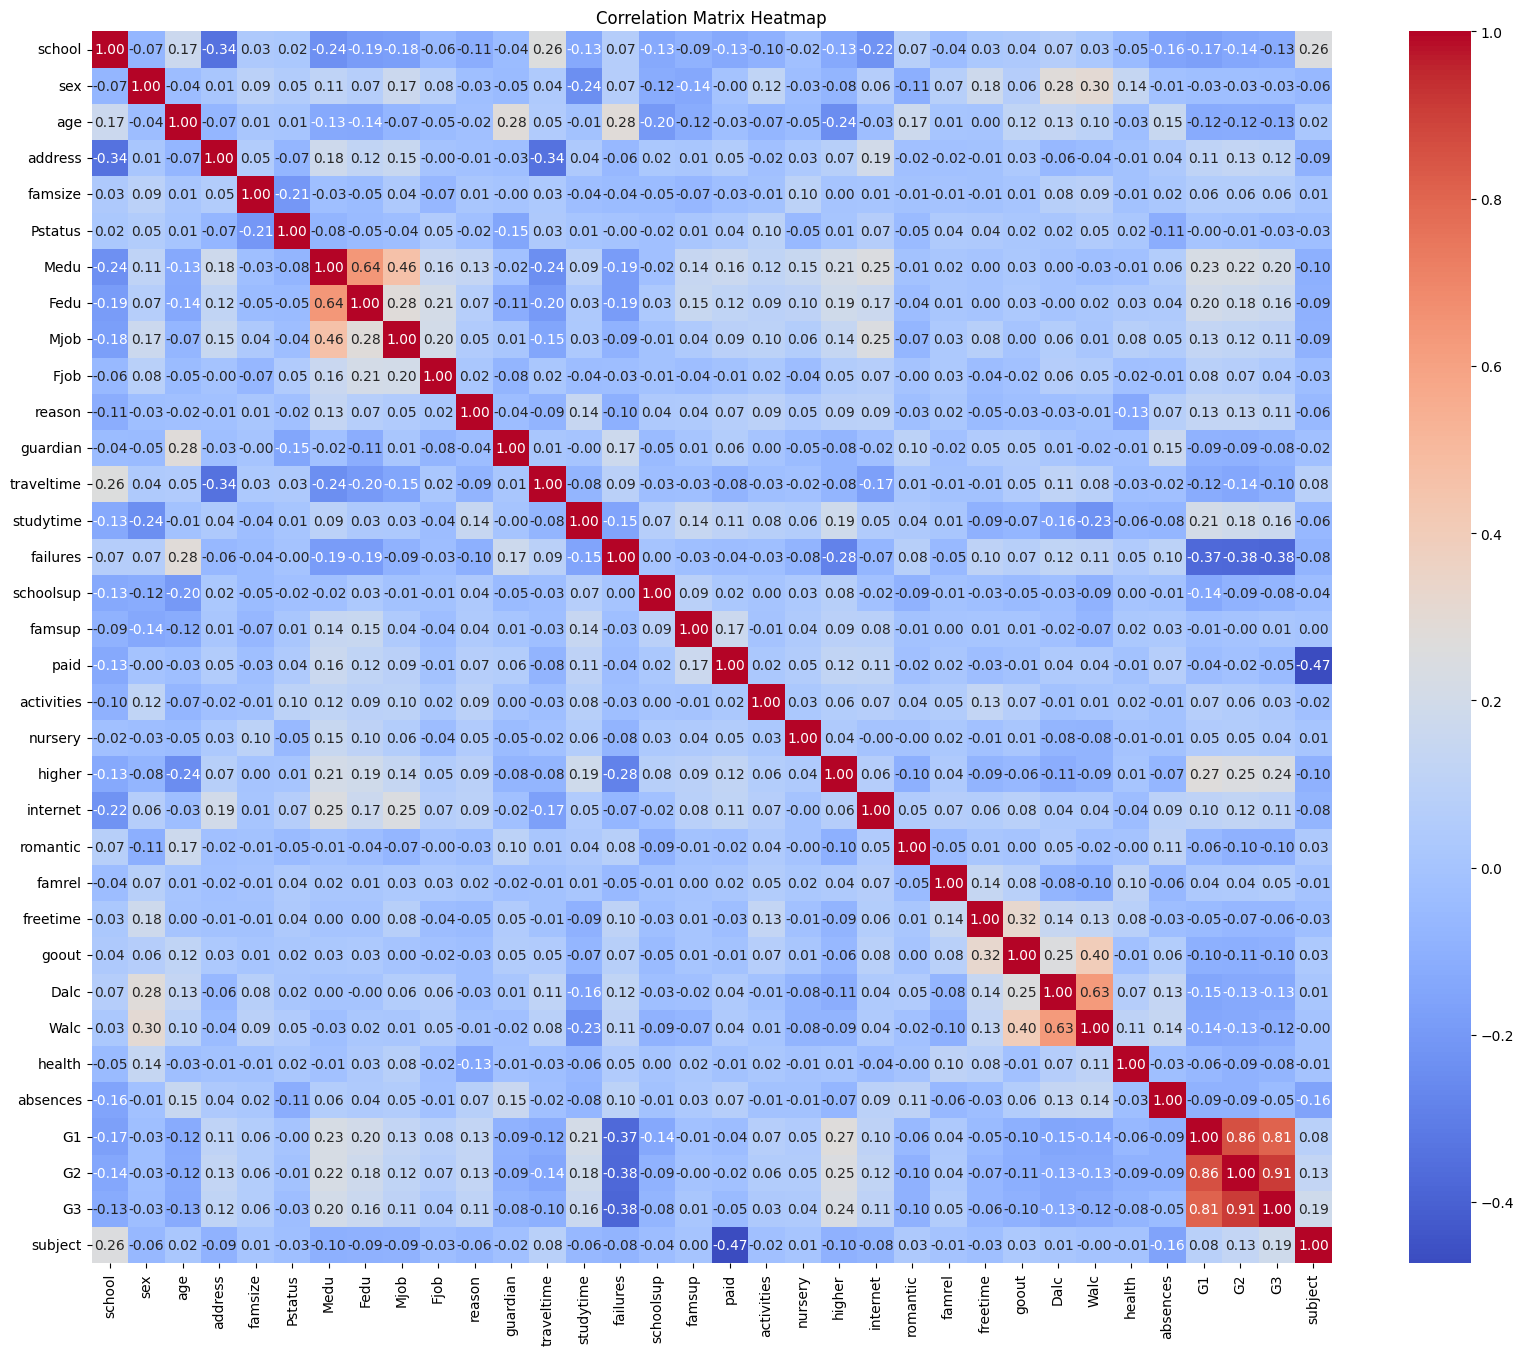

In [21]:
plt.figure(figsize=(20, 16))
corr_matrix = combined_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [22]:
def dimensionality_reduction(df):
    X = df.drop('G3', axis=1)
    y = df['G3']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.title('PCA of Combined Data')
    plt.show()

    # LDA
    lda = LDA(n_components=2)
    X_lda = lda.fit_transform(X_scaled, y)
    plt.figure(figsize=(8,6))
    plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
    plt.xlabel('First LDA component')
    plt.ylabel('Second LDA component')
    plt.title('LDA of Combined Data')
    plt.show()

    # t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    plt.figure(figsize=(8,6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    plt.xlabel('First t-SNE component')
    plt.ylabel('Second t-SNE component')
    plt.title('t-SNE of Combined Data')
    plt.show()

# **Model Training and Evaluation**

# **Feature Selection and Extraction**

In [23]:
# Feature importance using RandomForest
X = combined_df.drop('G3', axis=1)
y = combined_df['G3']
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature rankings
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")


Feature ranking:
1. feature 31 (0.17289612078208555)
2. feature 30 (0.1057577048060328)
3. feature 29 (0.058472234402412226)
4. feature 2 (0.03804361987675073)
5. feature 28 (0.03620618931881656)
6. feature 25 (0.03527691274862853)
7. feature 27 (0.034389809976389435)
8. feature 24 (0.03435616971567897)
9. feature 8 (0.03301617225830673)
10. feature 7 (0.03183270967263179)
11. feature 6 (0.029935132594191755)
12. feature 23 (0.029821760678350052)
13. feature 10 (0.02940218779264164)
14. feature 9 (0.027369185627028378)
15. feature 13 (0.02645346059375903)
16. feature 32 (0.02620875046323157)
17. feature 12 (0.021459898313601785)
18. feature 26 (0.020393451678224695)
19. feature 11 (0.019510682559405138)
20. feature 22 (0.017452449551824414)
21. feature 14 (0.01706922351966976)
22. feature 16 (0.016896192904237512)
23. feature 18 (0.01616570055346637)
24. feature 1 (0.015791936295306713)
25. feature 4 (0.015270083971097232)
26. feature 17 (0.01520921490878119)
27. feature 3 (0.013247208

# **Dimensionality Reduction**

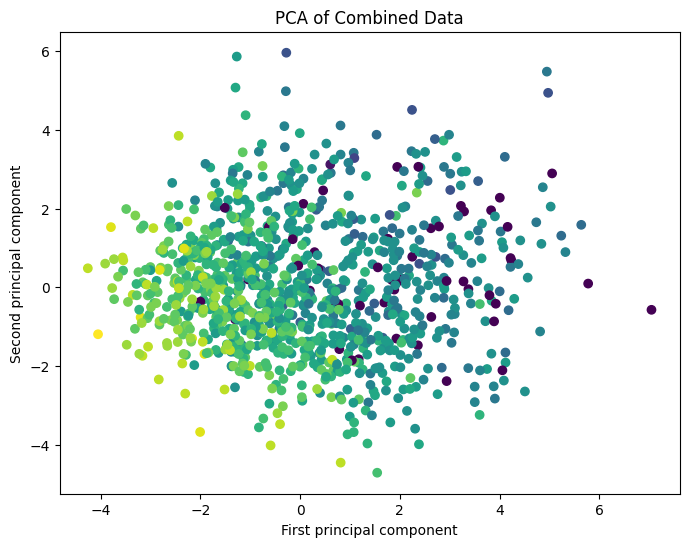

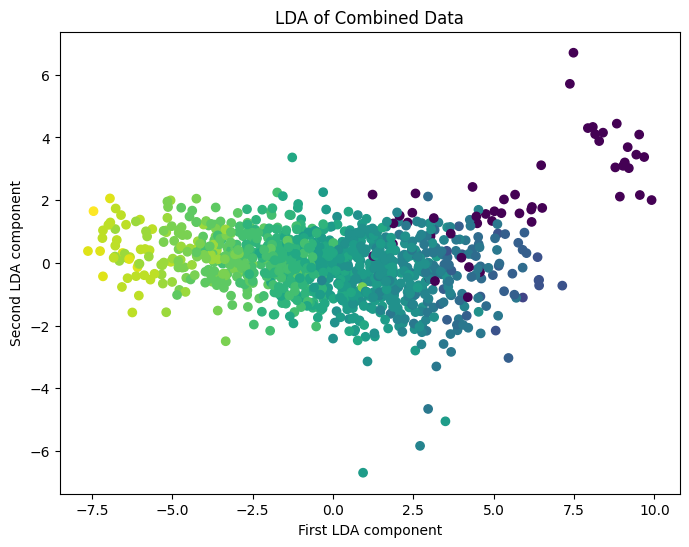

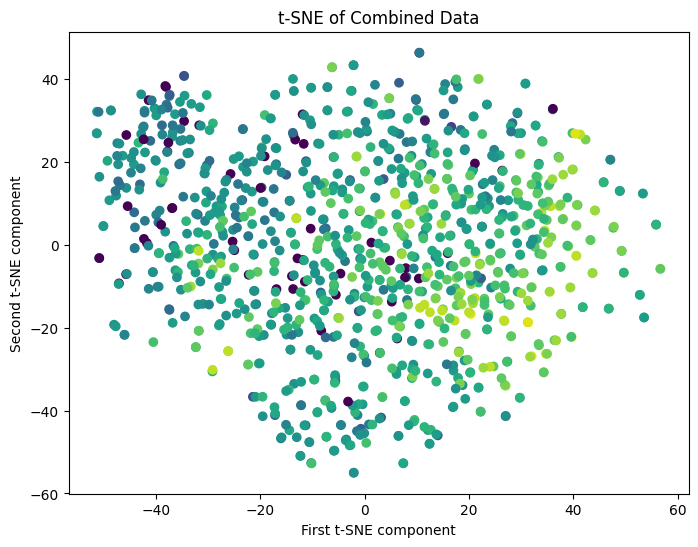

In [24]:
dimensionality_reduction(combined_df)

# **Train-Test Split and Model Training**

In [30]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import StratifiedShuffleSplit

Class counts before filtering:
 G3
10    153
11    151
13    113
12    103
14     90
15     82
8      67
9      63
0      53
16     52
17     35
18     27
7      19
6      18
5       8
19      7
20      1
4       1
1       1
Name: count, dtype: int64
Class counts after filtering:
 G3
10    153
11    151
13    113
12    103
14     90
15     82
8      67
9      63
0      53
16     52
17     35
18     27
7      19
6      18
5       8
19      7
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 8  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  1  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  6  1  4  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  2  0  9  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  2 19  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 12 14  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  6  7  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  3 17  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  5  5  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  5  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  2  1  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  2  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]]
Accuracy: 0.45933014354066987
Precision: 0.43365636304030675
Recall: 0.45933014354066987
F1 Score: 0.42919001834887943
ROC AUC Score: 0.9176868551195247


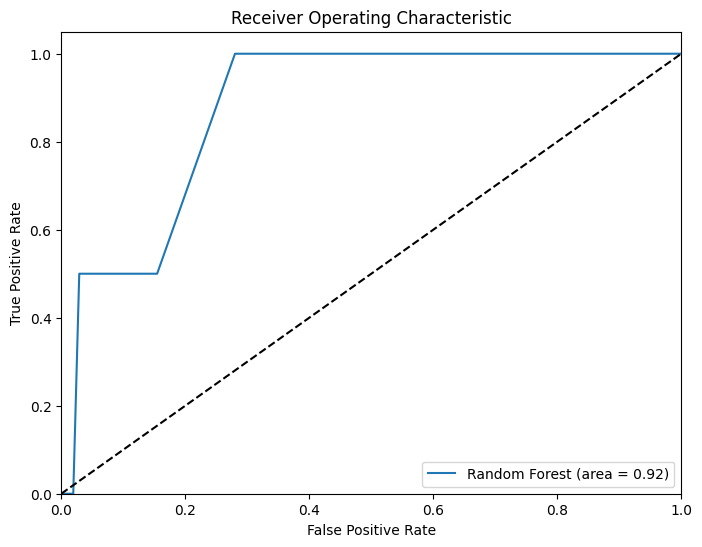

In [33]:
# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Count the instances for each class
class_counts = y.value_counts()
print("Class counts before filtering:\n", class_counts)

# Remove classes with less than 2 instances
threshold = 2
filtered_classes = class_counts[class_counts >= threshold].index
X_filtered = X[y.isin(filtered_classes)]
y_filtered = y[y.isin(filtered_classes)]

# Recount the instances for each class after filtering
filtered_class_counts = y_filtered.value_counts()
print("Class counts after filtering:\n", filtered_class_counts)

# Use StratifiedShuffleSplit to ensure the same class distribution in train and test sets
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in strat_split.split(X_filtered, y_filtered):
    X_train, X_test = X_filtered.iloc[train_index], X_filtered.iloc[test_index]
    y_train, y_test = y_filtered.iloc[train_index], y_filtered.iloc[test_index]

# Train a RandomForest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities
y_score = rf.predict_proba(X_test)

y_pred = rf.predict(X_test)

# Binarize the output
lb = LabelBinarizer()
lb.fit(y_train)
y_test_binarized = lb.transform(y_test)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test_binarized, y_score, multi_class='ovr')


print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1], pos_label=rf.classes_[1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# **Hyperparameter Tuning**

In [34]:
# Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6, 8],
    'criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters from Grid Search: {grid_search.best_params_}")

# Random Search
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(4, 10, num=7)],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)
print(f"Best parameters from Random Search: {random_search.best_params_}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best parameters from Grid Search: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best parameters from Random Search: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'entropy'}


# **Regression Task**

In [35]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.678707350030327
Root Mean Squared Error: 1.6366757009347719
R-squared: 0.8190838341558877
